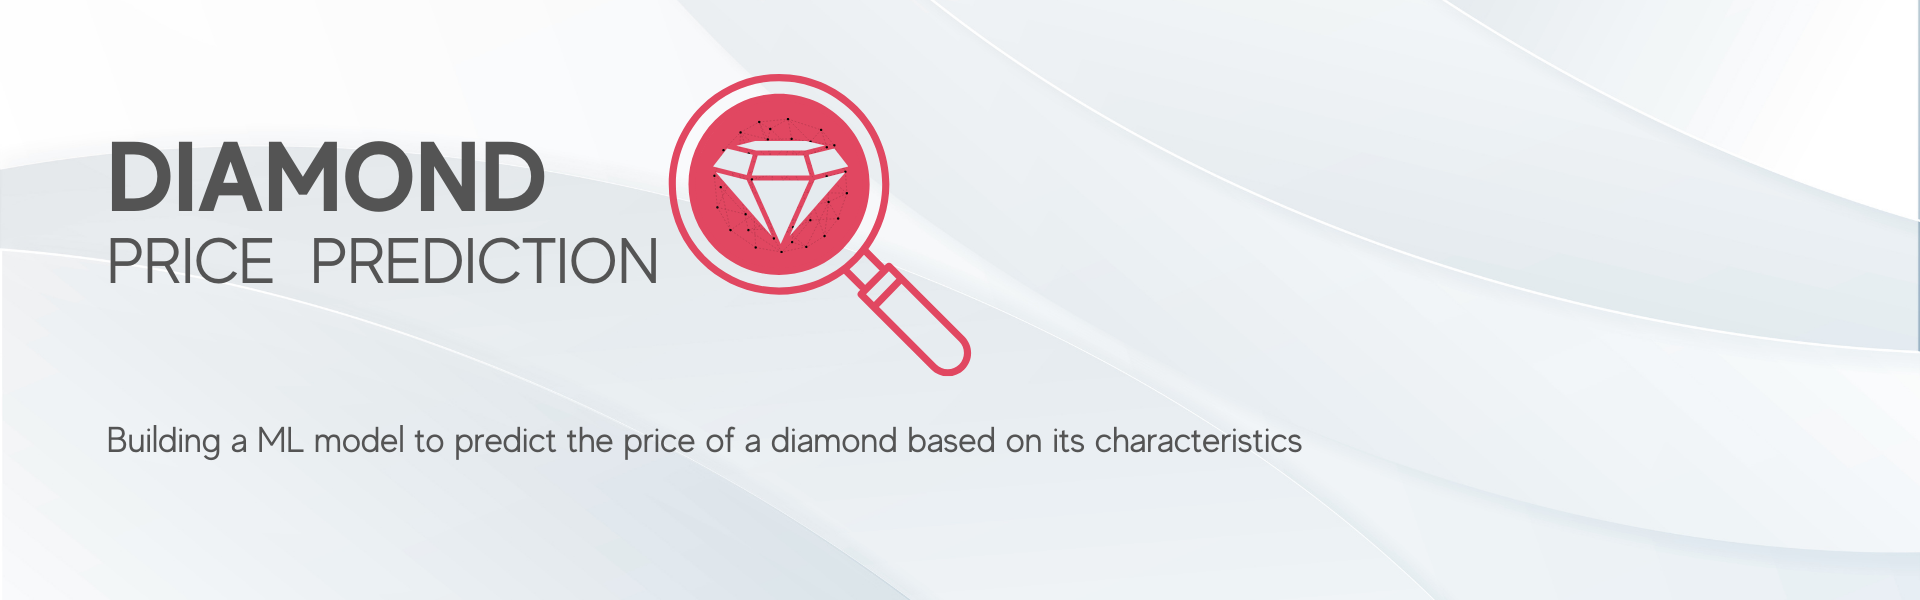

## Data Overview

The dataset contains the prices and other attributes of almost 54,000 diamonds. You can download the dataset from [here](https://www.kaggle.com/datasets/shivam2503/diamonds/code).



**Content**


**price:** The price of the Diamond

**carat:** The carat value of the Diamond

**cut:** The cut type of the Diamond, it determines the shine

**color:** The color value of the Diamond

**clarity:** The carat type of the Diamond

**depth:** The depth value of the Diamond

**table:** Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.

**x:** Width of the diamond

**y:** Length of the diamond

**z:** Height of the diamond


![image1](https://assets.diamondnexus.com/q_auto,f_auto/diamond_nexus/blog/2019/may/29e/the-4-cs.jpg)

**Diamond Clarity** : Refers to the grade we give a diamond based on the blemishes and inclusions found in a diamond.

**Diamond Color** : Diamond color refers to how clear a diamond is. The diamond color scale ranges from D (completely clear) to Z (a warm yellowish ting).

**Diamond Cut**: Diamond cut refers to the proportions and technical specs that determine how brilliant a diamond is (Fair, Good, Very Good, Premium, Ideal)

**Diamond Depth** : Depth % refers to the height of the diamond, from the culet to the top of the table.

**Diamond Table** : Diamond table % is determined by dividing the width of the table (top surface area) by the width (diameter) of the diamond. 



# Get the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [49]:
diamond = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SHAI_Level_1/Diamond  Project/diamond-price-prediction/train.csv")
diamond_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SHAI_Level_1/Diamond  Project/diamond-price-prediction/test.csv")

# Data Description

In [3]:
diamond.shape

(43152, 11)

In [4]:
diamond.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


**Basic Data Observations**

- price: Continuous, This is the Target Variable!
- carat: Continuous
- cut: Categorical
- color: Categorical
- clarity: Categorical
- depth: Continuous
- table: Continuous
- x: Continuous
- y: Continuous
- z: Continuous

In [6]:
diamond.describe() 

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Basic Data Statistical  Observations**
- The minimum values of "x", "y" and "z" are zero. Since a diamond cannot have a dimension equal to zero, this means there are incorrect values in the data. 
- "y" and "z" have some outliers that need to be removed or filled with another value.
- Since the id column is independently and identically distributed, we will drop it.


# Data Exploration

<Axes: >

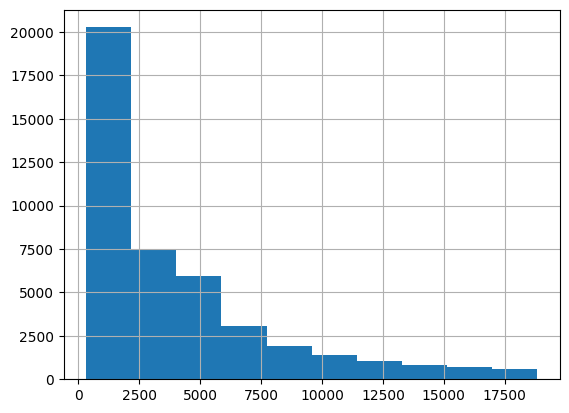

In [7]:
diamond['price'].hist()

The data distribution of the target is good. There are enough number of rows for each type of values

## Categorical variables: Bar plot

<Axes: ylabel='clarity'>

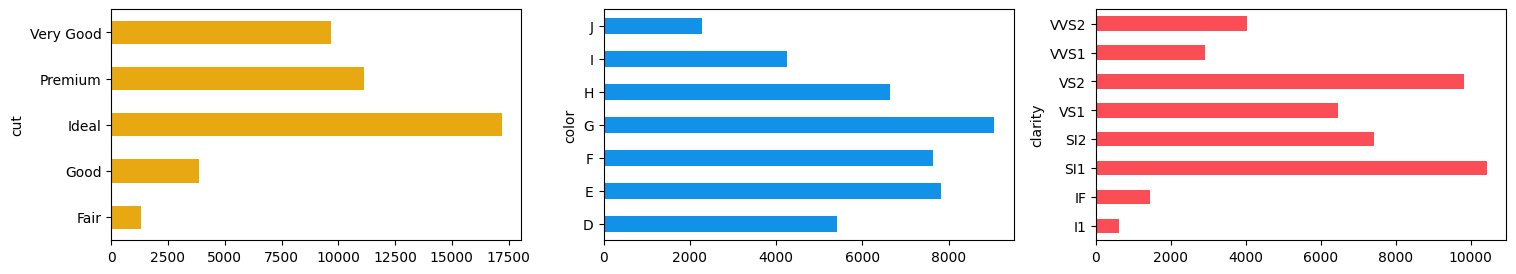

In [8]:
plt.figure(figsize=(18, 3))
plt.subplot(1, 3, 1)
diamond.groupby('cut').size().plot.barh(y='avg_traffic', x='weather_main', legend=None, color="#e8a811")

plt.subplot(1, 3, 2)
diamond.groupby('color').size().plot.barh(y='avg_traffic', x='weather_main', legend=None, color="#1192e8")

plt.subplot(1, 3, 3)
diamond.groupby('clarity').size().plot.barh(y='avg_traffic', x='weather_main', legend=None, color="#fa4d56")


We can't see columns that are too skewed, as they are not correlated with the target variable and provide no useful information. However, in this dataset, all three categorical variables will be selected for our model.

## Continuous variables: Histogram

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

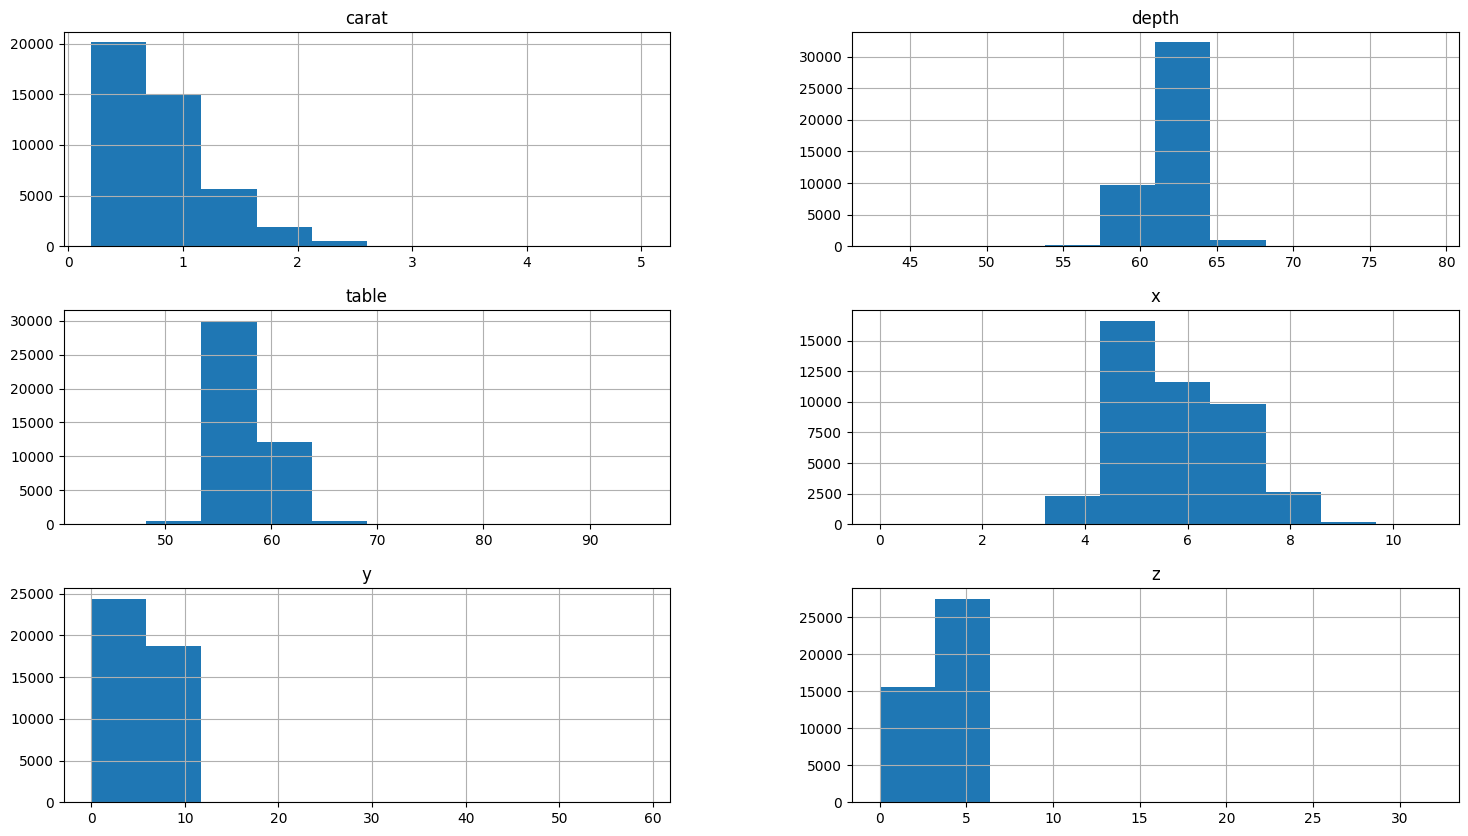

In [9]:
diamond.hist(['carat', 'depth', 'table', 'x','y','z'], figsize=(18,10))

The ideal histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done.

Two option to handle outliers :
- Delete the outlier Records
- Impute the outlier values with a value

# Data Cleaning

In [10]:
diamond.drop(['Id'],axis=1,inplace=True)
diamond = diamond.drop(diamond[diamond["x"]==0].index)
diamond = diamond.drop(diamond[diamond["y"]==0].index)
diamond = diamond.drop(diamond[diamond["z"]==0].index)

## Replacing outliers

In [11]:
diamond['x'][diamond['x']>2].sort_values(ascending=True)

10369     3.73
18252     3.74
26160     3.76
12294     3.77
17814     3.79
         ...  
31151    10.00
7389     10.01
18840    10.02
26030    10.14
26886    10.74
Name: x, Length: 43135, dtype: float64

In [50]:
pd.options.mode.chained_assignment = None 
diamond['x'][diamond['x']<3.73] = 3.73

In [13]:
diamond['y'][diamond['y']<20].sort_values(ascending=False)

26886    10.54
26030    10.10
18840     9.94
7389      9.94
31151     9.85
         ...  
17814     3.75
26160     3.73
12294     3.72
18252     3.71
10369     3.68
Name: y, Length: 43133, dtype: float64

In [51]:
diamond['y'][diamond['y']>20] =10.54

In [15]:
diamond['z'][diamond['z']<20].sort_values(ascending=False)

35359    8.06
26886    6.98
31151    6.43
16302    6.38
7389     6.31
         ... 
8393     2.24
38259    2.06
41462    1.53
17943    1.41
18444    1.07
Name: z, Length: 43134, dtype: float64

In [16]:
diamond['z'][diamond['z']>8] = 6.98

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

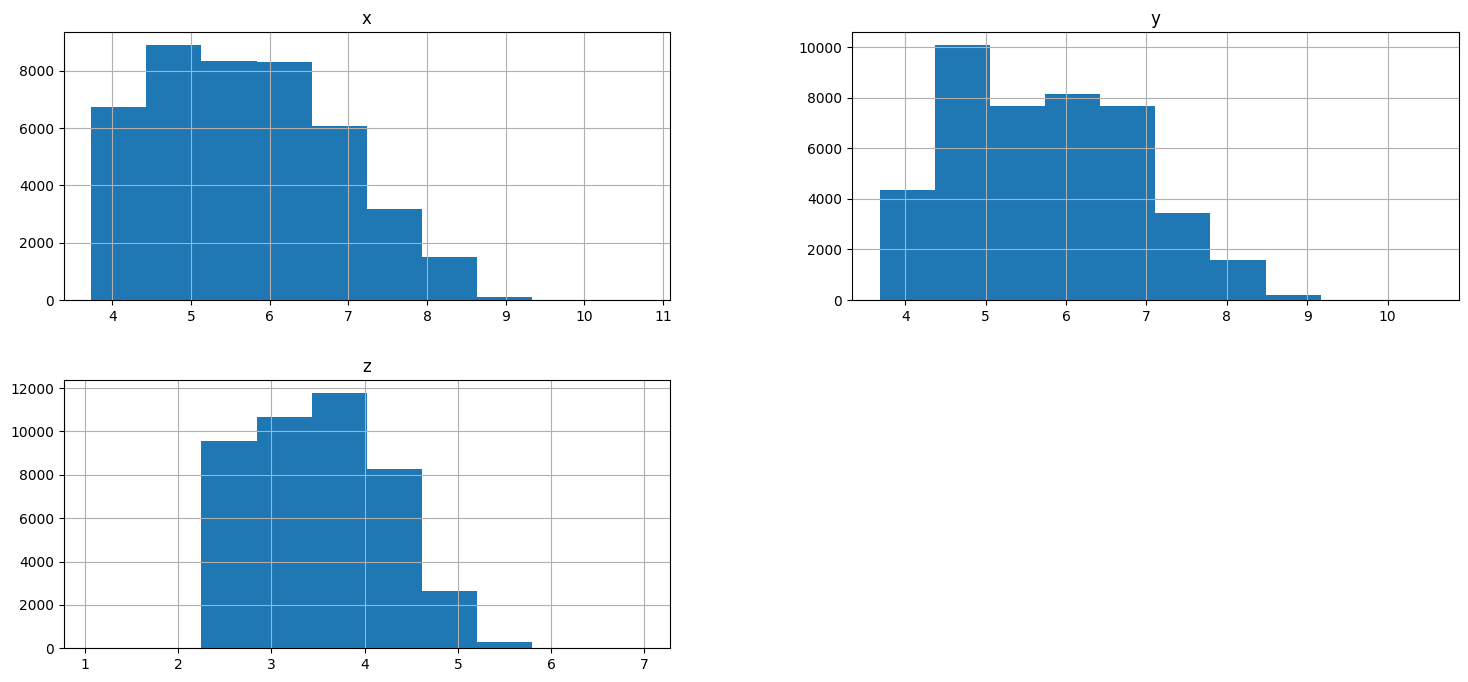

In [17]:
diamond.hist(['x','y', 'z'], figsize=(18,8))

In [18]:
diamond['z'][diamond['z']>2].sort_values(ascending=True)

38259    2.06
8393     2.24
9014     2.25
37767    2.26
17814    2.27
         ... 
16302    6.38
31151    6.43
26886    6.98
35359    6.98
10541    6.98
Name: z, Length: 43132, dtype: float64

In [19]:
diamond['z'][diamond['z']<2] = 2.06

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

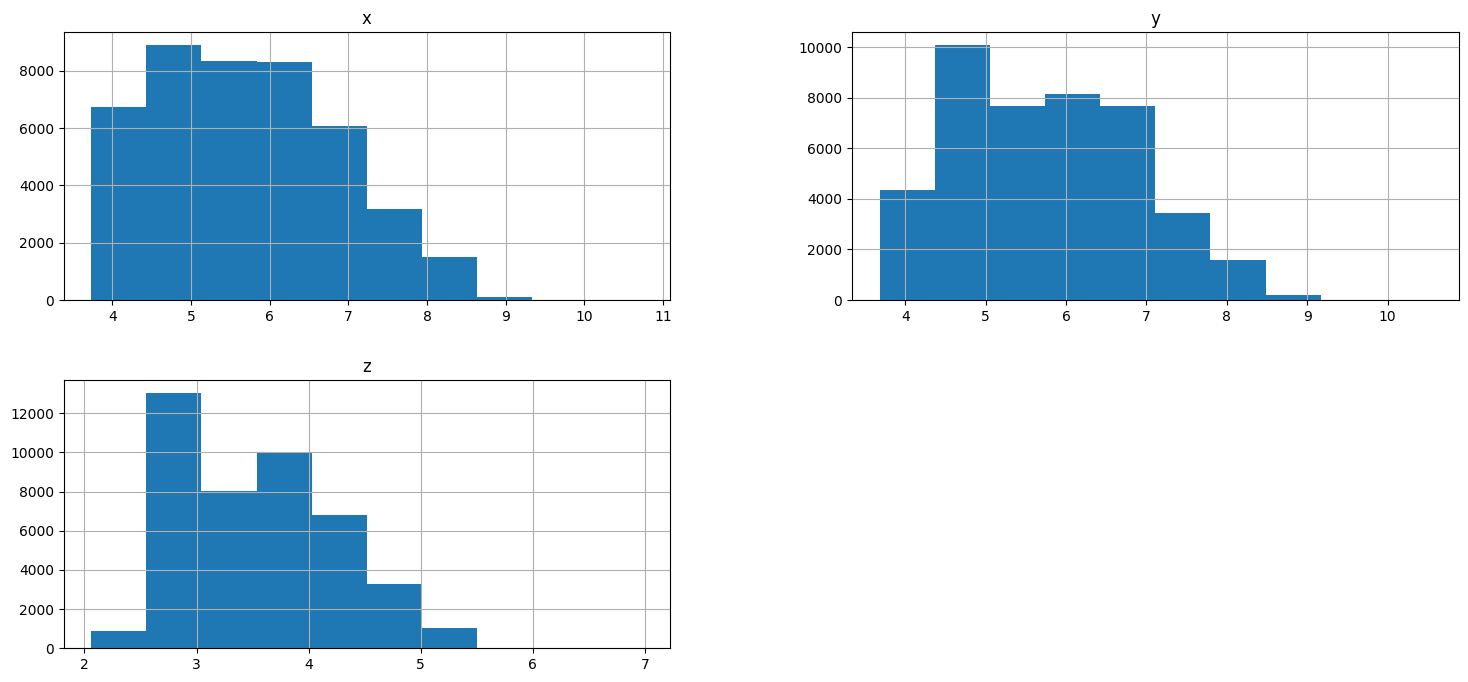

In [20]:
diamond.hist(['x','y', 'z'], figsize=(18,8))

In [21]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,0.797578,61.747386,57.457925,3927.668691,5.731757,5.733456,3.539412
std,0.473325,1.435091,2.233401,3983.324154,1.119336,1.111765,0.691544
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


## Missing values

In [22]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no missing values in our data

# Data Exploration | Part 2

## Continuous Vs Continuous : Scatter Charts

In [23]:
continuous_cols =  list(diamond.select_dtypes(include=["int64","float64"]).columns)

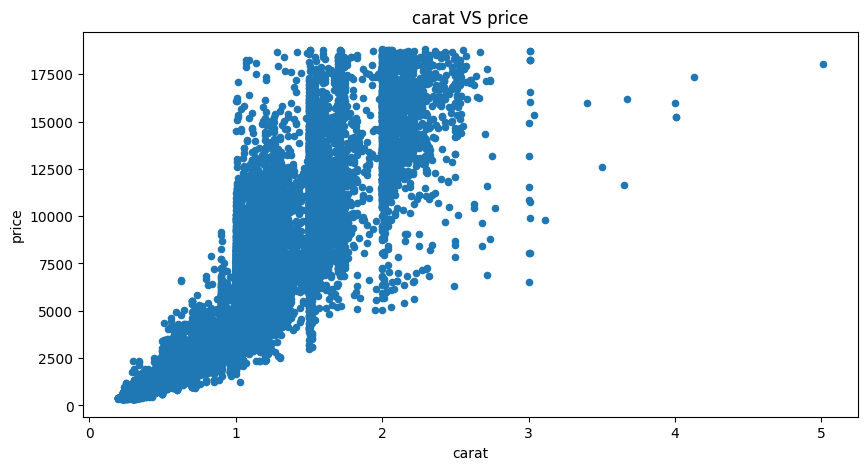

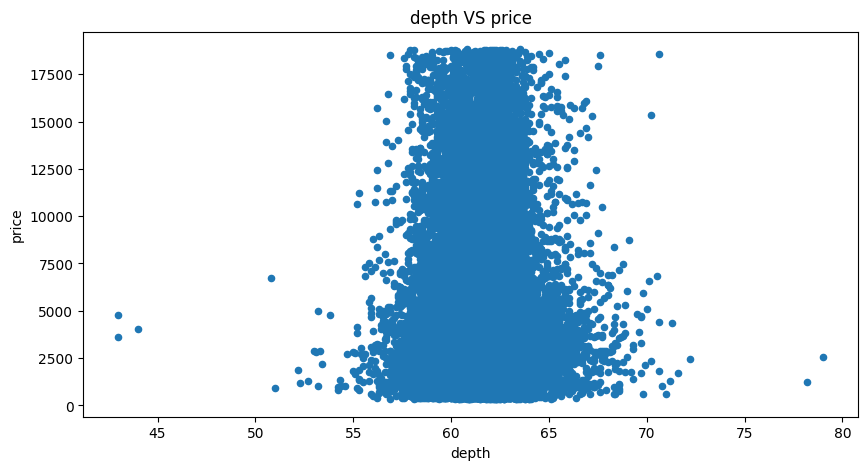

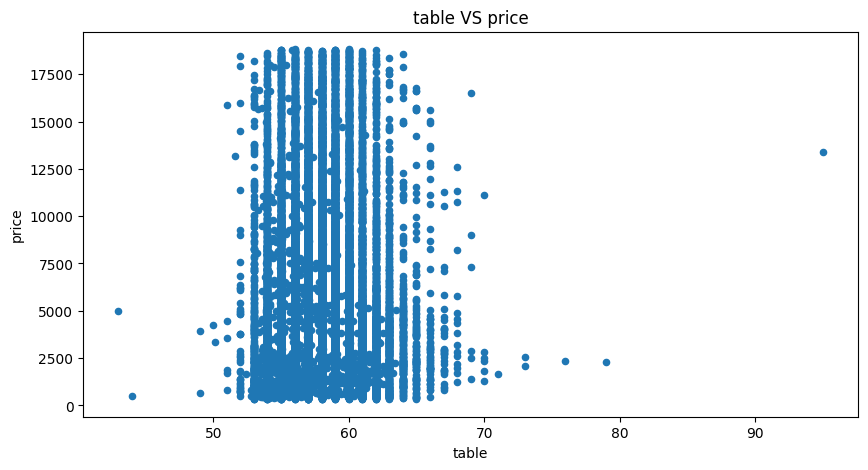

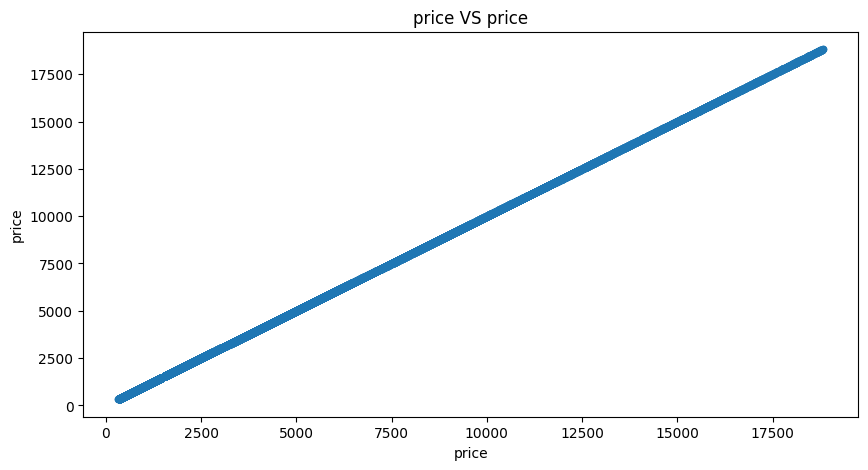

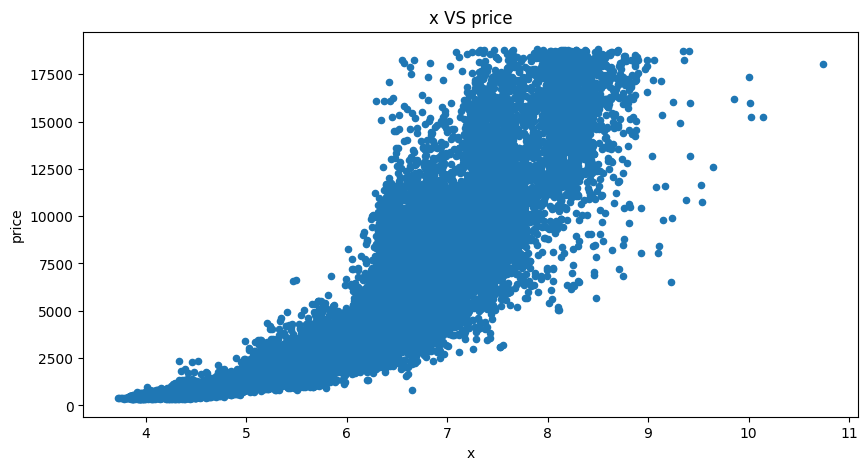

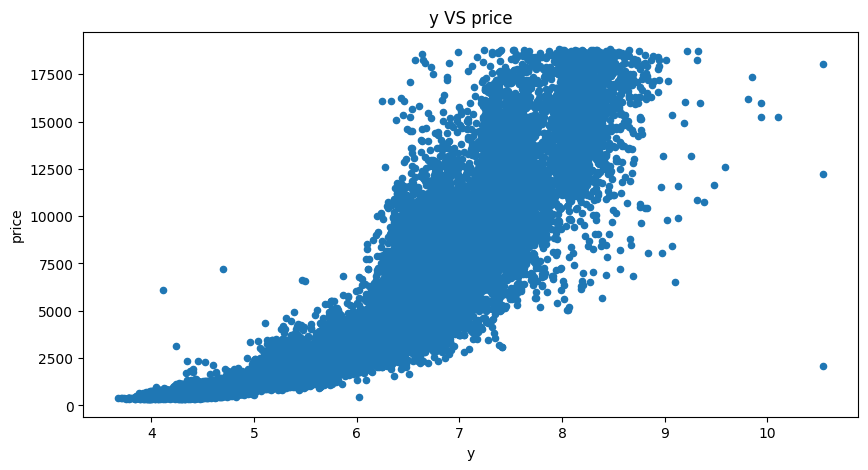

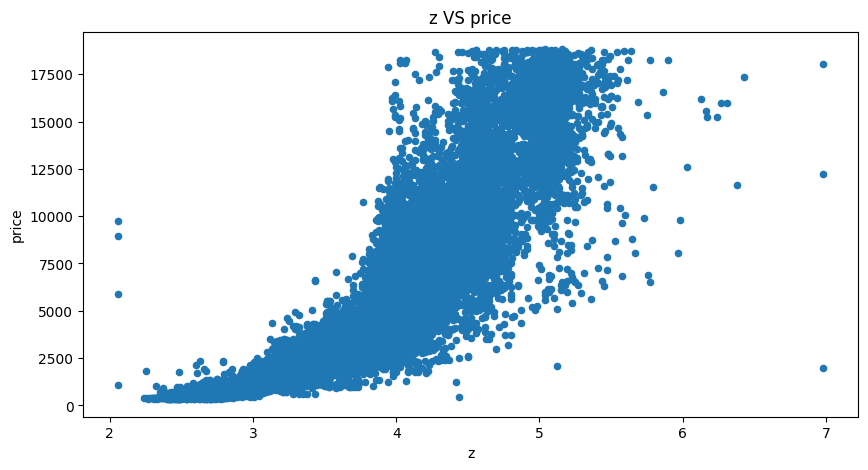

In [24]:
for predictor in continuous_cols:
    diamond.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

There could be three scenarios

- Increasing Trend
- Decreasing Trend
- No Trend



## Continuous Vs Continuous : Correlation Value

In [25]:
correlation = diamond[continuous_cols].corr()
correlation 

,carat,depth,table,price,x,y,z
carat,1.000000,0.023989,0.182861,0.921872,0.977923,0.976741,0.976248
depth,0.023989,1.000000,-0.302684,-0.013225,-0.029508,-0.032330,0.092344
table,0.182861,-0.302684,1.000000,0.128571,0.198068,0.191623,0.156435
price,0.921872,-0.013225,0.128571,1.000000,0.887172,0.888605,0.881949
x,0.977923,-0.029508,0.198068,0.887172,1.000000,0.998312,0.990695
y,0.976741,-0.032330,0.191623,0.888605,0.998312,1.000000,0.990505
z,0.976248,0.092344,0.156435,0.881949,0.990695,0.990505,1.000000


<ipython-input-26-44cb6bb8cb1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diamond.corr(),annot=True,cmap="viridis")


<Axes: >

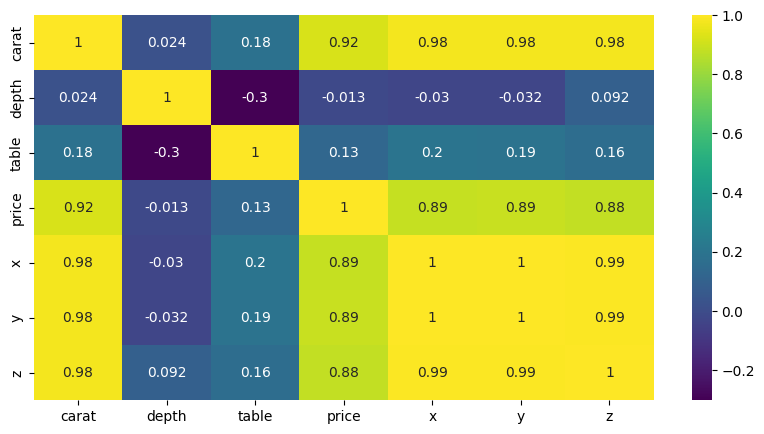

In [26]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(diamond.corr(),annot=True,cmap="viridis")

In [27]:
correlation['price'][abs(correlation['price']) > 0.2 ]

carat    0.921872
price    1.000000
x        0.887172
y        0.888605
z        0.881949
Name: price, dtype: float64

Obser

- carat has a strong positive correlation with price (0.92).
- depth has a weak negative correlation (-0.01) with price, indicating that the depth of a diamond does not have a significant impact on its price.
- Table has a moderate positive correlation with price (0.13).
- x, y and z dimensions have a strong positive correlation with price (>0.88).


## Categorical Vs Continuous : Box Plots

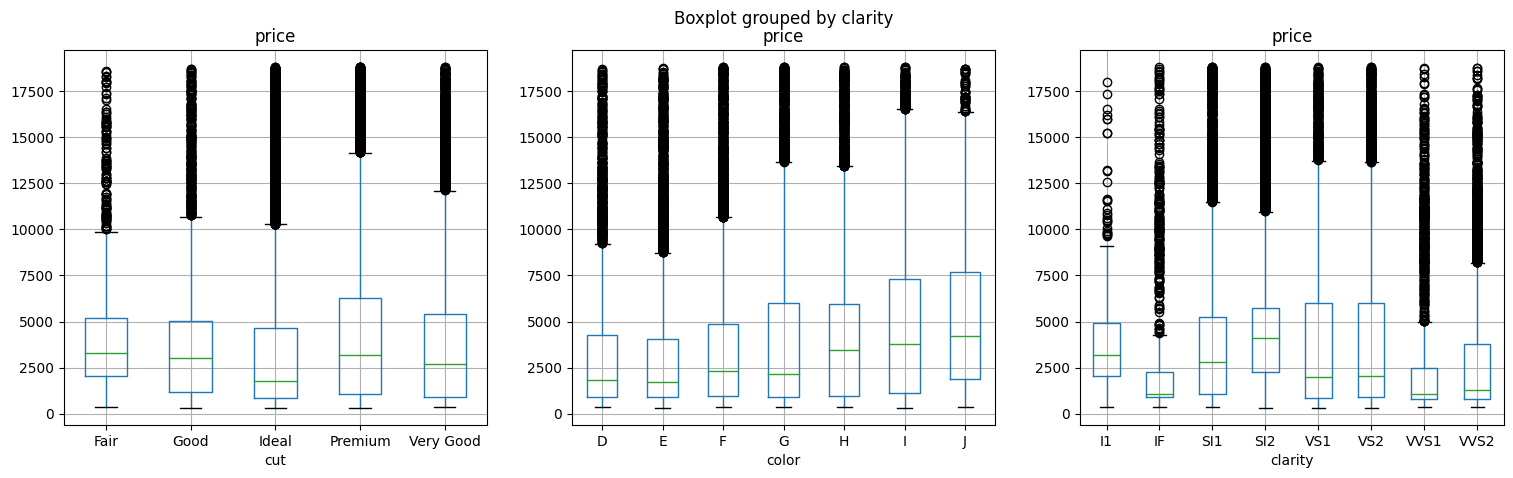

In [28]:
categorical_cols =  list(diamond.select_dtypes(include=["object"]).columns)

fig, ax = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(18,5))
for col , i in zip(categorical_cols, range(len(categorical_cols))):
    diamond.boxplot(column='price', by=col, figsize=(5,5), vert=True, ax=ax[i])

In our data, all three categorical variables looks correlated with the Target variable (price).

Selected categorical columns for our model: 'cut',  'color',  'clarity'

In [29]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


# Feature Selection & Tranformation

In [30]:
diamond['volume']=(diamond.x*diamond.y*diamond.z)
selected_cols=['carat', 'volume', 'cut', 'color', 'clarity','price']
diamond = diamond[selected_cols]
diamond.head()

,carat,volume,cut,color,clarity,price
0,1.06,176.483340,Ideal,I,SI2,4270
1,1.51,246.965796,Premium,G,VVS2,15164
2,0.32,52.943373,Ideal,F,VS2,828
3,0.53,86.422842,Ideal,G,VS2,1577
4,0.70,115.315200,Premium,H,VVS2,2596


In [31]:
diamond['cut'] = diamond['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
diamond['color'] = diamond['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
diamond['clarity'] = diamond['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

In [32]:
diamond.head()

,carat,volume,cut,color,clarity,price
0,1.06,176.483340,4,1,1,4270
1,1.51,246.965796,3,3,5,15164
2,0.32,52.943373,4,4,3,828
3,0.53,86.422842,4,3,3,1577
4,0.70,115.315200,3,2,5,2596


In [33]:
target ='price'
features = ['carat', 'volume', 'cut', 'color', 'clarity']

X_train_prepared = diamond[features]
y_train = diamond[target]

# Select and Train a Model

## Train Model

In [34]:
lin_reg_pipe = LinearRegression()

dec_tree_pipe = DecisionTreeRegressor()

ranfor_pipe = RandomForestRegressor()

xgb_pipe = XGBRegressor()

lgbm_pipe = lgb.LGBMRegressor()


pipelines = [lin_reg_pipe, dec_tree_pipe, ranfor_pipe, xgb_pipe, lgbm_pipe]

for pipe in pipelines:
    pipe.fit(X_train_prepared, y_train)

## Evaluation Using Cross-Validation

In [35]:
cv_results_rms = []
for model in pipelines:
    cv_score = cross_val_score(model, X_train_prepared,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score) 

## Measure Model’s RMSE

In [36]:
print("LinearRegression",cv_results_rms[0].mean())
print("DecisionTree",cv_results_rms[1].mean())
print("RandomForest",cv_results_rms[2].mean())
print("XGBRegressor",cv_results_rms[3].mean())
print("LGBMRegressor",cv_results_rms[4].mean())

LinearRegression -1223.9171322816721
DecisionTree -738.311616652212
RandomForest -570.2998572527575
XGBRegressor -556.569449970935
LGBMRegressor -549.6965325854189


## Grid Search

In [37]:
params = {'n_estimators': [100, 200], 'max_depth':[5,10], "learning_rate": [0.01, 0.1]}      

In [38]:
grid_model = GridSearchCV(lgb.LGBMRegressor(random_state=101), params, scoring='neg_root_mean_squared_error', cv=5)


In [39]:
grid_model.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=101),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error')

## Analyze the Best Models

In [40]:
cvres = grid_model.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

40.7333947270177 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
29.677468709843282 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
40.452597782937524 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}
29.324390954913856 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}
23.546774030186718 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
23.498094502497 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
23.521206607270802 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
23.513728299879578 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


In [41]:
final_model = grid_model.best_estimator_

# Evaluate Your System on the Test Set

In [42]:
diamond_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [43]:
diamond_test['volume'] = (diamond_test.x*diamond_test.y*diamond_test.z)
Id = diamond_test['Id']
diamond_test.drop(['Id','depth','table','x','y','z'],axis=1,inplace=True)

In [44]:
diamond_test['cut'] = diamond_test['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
diamond_test['color'] = diamond_test['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
diamond_test['clarity'] = diamond_test['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

In [45]:
diamond_test.head()

,carat,cut,color,clarity,volume
0,0.34,4,3,5,55.686400
1,0.71,3,5,3,116.719456
2,0.44,2,1,4,71.889720
3,0.81,3,5,1,134.037855
4,0.40,4,3,6,66.435840


In [46]:
pred = final_model.predict(diamond_test)
data = {'Id': Id, 'price':pred }
submission = pd.DataFrame(data=data)

In [47]:
submission.head()

,Id,price
0,1,992.991616
1,2,2945.034368
2,3,1128.680471
3,4,3245.244735
4,5,1756.815810


In [48]:
submission.describe()

,Id,price
count,10788.000000,10788.000000
mean,5394.500000,3648.545709
std,3114.371686,2904.490465
min,1.000000,356.986641
25%,2697.750000,1207.676325
50%,5394.500000,2578.632022
75%,8091.250000,5477.081371
max,10788.000000,13437.197485


# Thank you